# Loan Prediction

## Summary/ Abstract

The task is to predict if a loan will get approved or not based on a set of parameters. The set of parameters include demographic varibles such as education level, employment and gender. `Logistic Regression` and `Linear SVC` approaches were used to build the models. Logistic Regression was the best performing model with an ou  



## Table of Contents:
1. Introduction & Initial Housekeeping
2. Getting Data
3. Exploring Data
4. Data Fixes & Feature Engineering
5. The Analytical Dataset *(ideally, using a pipeline)*
6. Training Models
7. The Best Model

<br>

***

## 1. Introduction & Initial Housekeeping

I'll be setting up the environment and shall import some of the standard packages

In [3]:
# Importing Packages 

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Loan_Prediction"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

#create the reqired folders if they don't already exist
os.makedirs(IMAGES_PATH, exist_ok=True)

# A simple function that helps save images
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [4]:
import os
os.getcwd()

'/Users/ramavishwanathan/Desktop/Rama Files/purse/ml_all/ML_Projects/ML_Projects_git'

***

## 2. Getting Data

Goals:
1. Reading Data
2. Dividing the data into Training, Validation and Testing sets (70:15:15)

Testing set is to evaluate the *final model* i.e the model that perfoms the best across the training and validation sets

In [30]:
import pandas as pd
data = pd.read_csv("/Users/ramavishwanathan/Desktop/Rama Files/purse/ml_all/ML_Projects/datasets/loan_prediction/train.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [32]:
# Splitting the data into training, testing and validation sets (70:15:15)

from sklearn.model_selection import train_test_split

train, other = train_test_split(data,test_size = 0.3, random_state = 42)
val, test = train_test_split(other,test_size = 0.5, random_state = 42)


In [33]:
print("size of training set ", train.shape)
print("size of validation set ", val.shape)
print("size of training set ", test.shape)

size of training set  (429, 13)
size of validation set  (92, 13)
size of training set  (93, 13)


<br>

***

## 3. Exploring Data

Goals:
1. Developing familarity with variables and extent of missing values
2. Univariate Analysis to understand the distribution of variables
3. Bi-variate Analysis to determine the relationships between key variables



In [10]:
train.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Univariate Plots

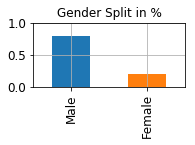

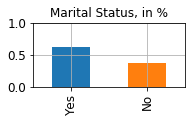

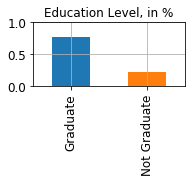

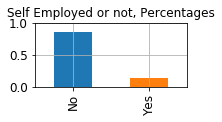

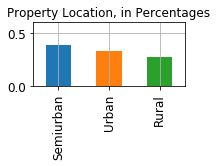

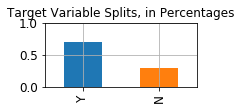

Saving figure Univariates for Categorical Variables


<Figure size 432x288 with 0 Axes>

In [34]:
# Exploratory Univariate Plots for Categorical Variables

plt.figure(1)

plt.subplot(3,2,1)
train["Gender"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Gender Split in %")
plt.grid()
plt.ylim(0,1)
plt.show()



plt.subplot(3,2,2)
train["Married"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Marital Status, in %")
plt.grid()
plt.ylim(0,1)
plt.show()


plt.subplot(3,2,3)
train["Education"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Education Level, in %")
plt.grid()
plt.ylim(0,1)
plt.show()


plt.subplot(3,2,4)
train["Self_Employed"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Self Employed or not, Percentages")
plt.grid()
plt.ylim(0,1)
plt.show()

plt.subplot(3,2,5)
train["Property_Area"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Property Location, in Percentages")
plt.grid()
plt.ylim(0,0.6)
plt.show()

#Finally a split of the target variable
plt.subplot(3,2,6)
train["Loan_Status"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Target Variable Splits, in Percentages")
plt.grid()
plt.ylim(0,1)
plt.show()

save_fig('Univariates for Categorical Variables', tight_layout = False)

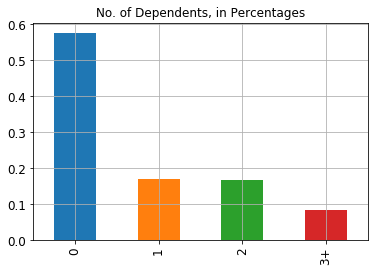

Saving figure No. of Dependents


<Figure size 432x288 with 0 Axes>

In [6]:
# Exploring 'Dependents' Variables

train["Dependents"].value_counts(normalize = True).plot(kind = "bar")
plt.title("No. of Dependents, in Percentages")
plt.grid()
plt.show()

save_fig('No. of Dependents', tight_layout = False)

In [12]:
# Exploring applicant income and co-applicant income variables
# both these variables have no missing values

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Saving figure Distributions of Applicant and Coapplicant Incomes


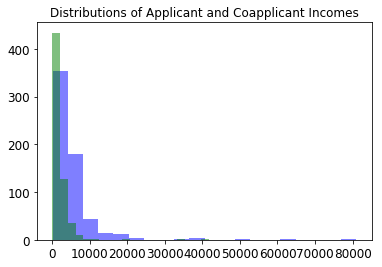

In [7]:
# Exploring applicant income and co-applicant income variables
# both these variables have no missing values

plt.figure(1)

plt.title('Distributions of Applicant and Coapplicant Incomes')
plt.hist(train['ApplicantIncome'], bins =20, alpha = 0.5, color = 'blue',histtype='stepfilled')
plt.hist(train['CoapplicantIncome'], bins =20, alpha = 0.5, color = 'green',histtype='stepfilled')

save_fig('Distributions of Applicant and Coapplicant Incomes', tight_layout = False)

Saving figure Distributions of Loan Amounts


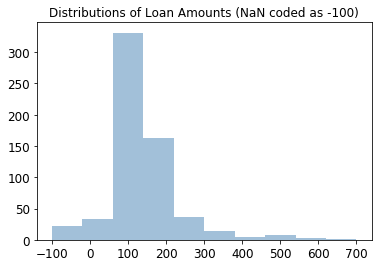

In [8]:
# Exploring the loan amount variable
# IMP: There are NA values so they need to be first handled

sample = train['LoanAmount'].replace(np.nan, -100)

plt.title('Distributions of Loan Amounts (NaN coded as -100)')
plt.hist(sample, alpha = 0.5, color = 'steelblue')
save_fig('Distributions of Loan Amounts', tight_layout = False)

Saving figure Distributions of Loan Amount Term


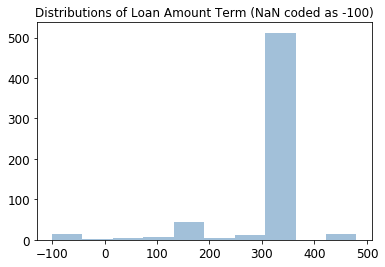

In [9]:
# Exploring the loan amount term variable
# IMP: There are NA values so they need to be first handled

sample2 = train['Loan_Amount_Term'].replace(np.nan, -100)

plt.title('Distributions of Loan Amount Term (NaN coded as -100)')
plt.hist(sample2, alpha = 0.5, color = 'steelblue')
save_fig('Distributions of Loan Amount Term', tight_layout = False)

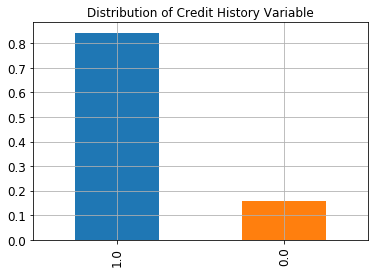

Saving figure Distribution of Credit History Variable


<Figure size 432x288 with 0 Axes>

In [10]:
# Exploring the credit history variable
# IMP: There are NA values which need to be handled later on


train["Credit_History"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Distribution of Credit History Variable")
plt.grid()
plt.show()


save_fig('Distribution of Credit History Variable', tight_layout = False)

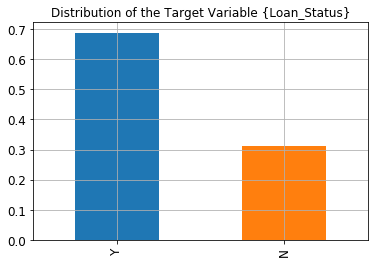

Saving figure Distribution of the Target Variable {Loan_Status}


<Figure size 432x288 with 0 Axes>

In [13]:
# Exploring the Target variable (Loan Status)


train["Loan_Status"].value_counts(normalize = True).plot(kind = "bar")
plt.title("Distribution of the Target Variable {Loan_Status}")
plt.grid()
plt.show()


save_fig('Distribution of the Target Variable {Loan_Status}', tight_layout = False)

#### Quick Summary
* `Gender`: 80% of the sample comprises males
* `Marital Status`: 60% of the people are married 
* `Dependents`: 60% have chldren
* `Education`: 70% are graduates
* `Self Employed` : Miniscule <10%
* `Applicant Income` :(2800, 3800, 5800) corresponding to 25th, 50th and 75th percentile
* `Co-Applicant Income` : (0, 1188, 2300) corresponding to 25th, 50th and 75th percentile
* `Loan Amount` : (100, 128, 168) corresponding to 25th, 50th and 75th percentile
* `Loan Amount term` : 30 years for most
* `Credit History` : 80% of the applicants have a credit history
* `Property Area` : Almost equal mix of Semi-Uban, Urban and Rural
* `Loan_Status` (Target Variable): 70% of the applicants had their loans approved


### Bivariate Analysis

for the purposes of bi-variate analysis, we will be working on a version of the training set that does not have any missing values.

In [49]:
train_copy = train.copy()

In [50]:
print("size of train: ", train.shape)

size of train:  (429, 13)


In [51]:
train_copy = train_copy.dropna()
print("size of train with NAs removed: ", train_copy.shape)

size of train with NAs removed:  (339, 13)


Saving figure Applicant Income vs. CoApplicant Income


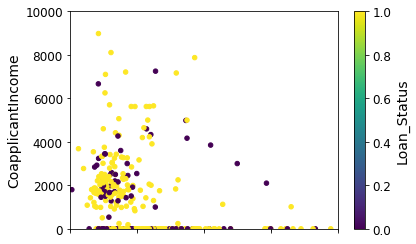

In [83]:
train_copy.plot(kind = "scatter", x = "ApplicantIncome", y = "CoapplicantIncome", c= "Loan_Status", cmap='viridis', alpha = 1 )
plt.xlabel(train_copy.ApplicantIncome)

plt.xlim(0, 20000) # a good way to eliminate outliers
plt.ylim(0, 10000) # a good way to eliminate outliers

save_fig('Applicant Income vs. CoApplicant Income', tight_layout = False)

Saving figure Applicant Income vs. Loan Amount


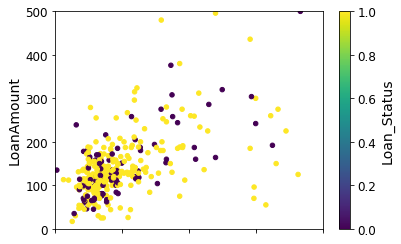

In [84]:
train_copy.plot(kind = "scatter", x = "ApplicantIncome", y = "LoanAmount", c= "Loan_Status", cmap='viridis', alpha = 1)

plt.xlim(0, 20000) # a good way to eliminate outliers
plt.ylim(0, 500) # a good way to eliminate outliers

save_fig('Applicant Income vs. Loan Amount', tight_layout = False)

In [66]:
#creatng a counter for pivot table variables
train_copy['counter'] = 1

train_copy.pivot_table('counter', index='Gender', columns='Loan_Status', aggfunc = sum)

Loan_Status,0,1
Gender,,
Female,22,43
Male,77,197


In [67]:
train_copy.pivot_table('counter', index='Married', columns='Loan_Status', aggfunc = sum)

Loan_Status,0,1
Married,,
No,47,81
Yes,52,159


In [70]:
train_copy.pivot_table('counter', index='Dependents', columns='Loan_Status', aggfunc = sum)

Loan_Status,0,1
Dependents,,
0,57,137
1,23,35
2,13,45
3+,6,23


In [71]:
train_copy.pivot_table('counter', index='Education', columns='Loan_Status', aggfunc = sum)

Loan_Status,0,1
Education,,
Graduate,77,193
Not Graduate,22,47


In [72]:
train_copy.pivot_table('counter', index='Self_Employed', columns='Loan_Status', aggfunc = sum)

Loan_Status,0,1
Self_Employed,,
No,82,208
Yes,17,32


In [73]:
train_copy.pivot_table('counter', index='Credit_History', columns='Loan_Status', aggfunc = sum)

Loan_Status,0,1
Credit_History,,
0.0,42,5
1.0,57,235


In [74]:
train_copy.pivot_table('counter', index='Property_Area', columns=['Loan_Status'], aggfunc = [sum])

Loan_Status,0,1
Property_Area,,
Rural,36,57
Semiurban,25,114
Urban,38,69


In [86]:
train_copy.pivot_table('LoanAmount', index='Property_Area', columns='Loan_Status', aggfunc = np.mean)

Loan_Status,0,1
Property_Area,,
Rural,159.638889,151.947368
Semiurban,142.200000,140.596491
Urban,144.078947,137.608696


#### Summary
1. Clear presence of outliers in `ApplicantIncome` and `CoapplicantIncome` variables - needs to be addressed
2. `Gender` Males stand a better chance of getting their loans passed
3. `Married` People who are married have a better chance of getting their loans passed
4. `Self_Employed` People who are self employed have a lower chance of having their loans approved
5. `Credit_History` As expected, people who don't have a credit history have a much lesser chance of getting their loans approved
6. `Property_Area` People who have purchased property at Semiuran areas have a much higher chance of having their loan approved as opposed to those who have bought property at Rural or Urban areas 


***


## 4. Data Fixes & Feature Engineering

Data Fixes:
1. Converting Variable Type
2. Missing Value Treatment

Feature Engineering:
The existing features seem to be sufficient. No new features will be created


#### List of Data Fixes
1. [done] Convert target variable, `Loan_Status` to binary
2. [done] Convert credit history to categorical

In [44]:
# Fix target variable using label encoders

print(train.head(2))

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

train.Loan_Status = label_encoder.fit_transform(train.Loan_Status)

print(train.head(2))

#This works well - superb :) 

      Loan_ID Gender Married Dependents     Education Self_Employed  \
553  LP002788   Male     Yes          0  Not Graduate            No   
601  LP002950   Male     Yes          0  Not Graduate           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
553             2454             2333.0       181.0             360.0   
601             2894             2792.0       155.0             360.0   

     Credit_History Property_Area Loan_Status  
553             0.0         Urban           N  
601             1.0         Rural           Y  
      Loan_ID Gender Married Dependents     Education Self_Employed  \
553  LP002788   Male     Yes          0  Not Graduate            No   
601  LP002950   Male     Yes          0  Not Graduate           NaN   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
553             2454             2333.0       181.0             360.0   
601             2894             2792.0       155.0           

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


**Target Variable** `Loan_Status`: `Y` has been encoded as `1`

In [46]:
val.Loan_Status = label_encoder.fit_transform(val.Loan_Status)
test.Loan_Status = label_encoder.fit_transform(test.Loan_Status)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [45]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 553 to 102
Data columns (total 13 columns):
Loan_ID              429 non-null object
Gender               418 non-null object
Married              428 non-null object
Dependents           418 non-null object
Education            429 non-null object
Self_Employed        411 non-null object
ApplicantIncome      429 non-null int64
CoapplicantIncome    429 non-null float64
LoanAmount           414 non-null float64
Loan_Amount_Term     418 non-null float64
Credit_History       397 non-null float64
Property_Area        429 non-null object
Loan_Status          429 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 46.9+ KB
None


In [47]:
# Credit History to Categorical
train['Credit_History'] = train['Credit_History'].astype('category')
val['Credit_History'] = val['Credit_History'].astype('category')
test['Credit_History'] = test['Credit_History'].astype('category')


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [88]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 429 entries, 553 to 102
Data columns (total 13 columns):
Loan_ID              429 non-null object
Gender               418 non-null object
Married              428 non-null object
Dependents           418 non-null object
Education            429 non-null object
Self_Employed        411 non-null object
ApplicantIncome      429 non-null int64
CoapplicantIncome    429 non-null float64
LoanAmount           414 non-null float64
Loan_Amount_Term     418 non-null float64
Credit_History       397 non-null category
Property_Area        429 non-null object
Loan_Status          429 non-null int64
dtypes: category(1), float64(3), int64(2), object(7)
memory usage: 44.1+ KB
None


`Credit_History` variable has been converted to categorical

In [87]:
# separate feature variables and target

X_train = train.drop("Loan_Status",axis = 1, inplace = False)
y_train = train[["Loan_Status"]].copy()

X_val = val.drop("Loan_Status",axis = 1, inplace = False)
y_val = val[["Loan_Status"]].copy()


X_test = test.drop("Loan_Status",axis = 1, inplace = False)
y_test = test[["Loan_Status"]].copy()


In [89]:
# Data Transformation Pipeline - initialization

cat_features = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

num_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [90]:
# Data Transformation Pipeline - definition

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Numeric
num_pipeline = Pipeline([
    ('impute_num',SimpleImputer(strategy = "median")),
    ('scale_num', StandardScaler()),
]
)


# Categorical
cat_pipeline = Pipeline([
    ('impute_cat', SimpleImputer(strategy = "most_frequent")),
    ('encode',OneHotEncoder())
])


# Full Pipeline - Consolidated
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", cat_pipeline, cat_features)
])

In [91]:
# Data Transformation Pipeline - implementation

X_train_prep = full_pipeline.fit_transform(X_train)
X_val_prep = full_pipeline.fit_transform(X_val)
X_test_prep = full_pipeline.fit_transform(X_test)


print("X_train shape", X_train.shape)

print("\n")

print("X_train_prep shape", X_train_prep.shape)

X_train shape (429, 12)


X_train_prep shape (429, 20)


<br>

***

## 5. The Analytical Dataset

`X_train_prep` is the prepared training dataset that has:
* missing values imputed using `SimpleImputer`,
* numerical values scaled (or nomalized) using `StandardScaler`, and
* categorical values encoded using `OneHotEncoder`

Additionally, we have a validation set `X_val_prep` and test set `X_test_prep`

<br>

***

## 6. Training Models

review next step: Quickly get upto speed on 'classification using scikit-learn'


1. Basic Logistic Classifier
2. Linear SVM with SGD Classifier and Cross Validation 


#### Basic Logistic Classifier

In [115]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(penalty = 'l1', random_state = 42, solver = 'liblinear', max_iter = 1000)

In [124]:
log_model.fit(X_train_prep, y_train)
Y_train_log = log_model.predict(X_train_prep)

print("Sample Output: " ,Y_train_log[5:9])

Sample Output:  [0 1 0 1]


/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:
# performance on training set
model_performance_scores(y_train,Y_train_log)

model performance scores:  

Accuracy =  0.8205128205128205
Precision =  0.8048780487804879
Recall =  0.9834437086092715
F1 =  0.8852459016393444




In [126]:
# performance on validation set
Y_val_log = log_model.predict(X_val_prep)
model_performance_scores(y_val,Y_val_log)

model performance scores:  

Accuracy =  0.8043478260869565
Precision =  0.76
Recall =  1.0
F1 =  0.8636363636363636




#### Quick Diagnosic
The model suffers from good recall and poor precision, worthwhile to investigate if setting a higher threshold value will help.

In [132]:
Y_train_log_probab = log_model.predict_proba(X_train_prep)

print("Sample Output: " ,Y_train_log_probab[5:9])

print("Sample Output: " ,Y_train_log_probab[5:9])

Sample Output:  [[0.80977795 0.19022205]
 [0.21670196 0.78329804]
 [0.93003717 0.06996283]
 [0.18454997 0.81545003]]
Sample Output:  [[0.80977795 0.19022205]
 [0.21670196 0.78329804]
 [0.93003717 0.06996283]
 [0.18454997 0.81545003]]


In [138]:
prob_loan_not_approved, prob_loan_approved = np.hsplit(Y_train_log_probab,2)

print("Probability of loan approval: ", prob_loan_approved[5:9])

Probability of loan approval:  [[0.19022205]
 [0.78329804]
 [0.06996283]
 [0.81545003]]


In [145]:
Y_train_log2 = (prob_loan_approved > 0.6)

In [146]:
model_performance_scores(y_train, Y_train_log2)

model performance scores:  

Accuracy =  0.8228438228438228
Precision =  0.8087431693989071
Recall =  0.9801324503311258
F1 =  0.8862275449101796




In [147]:
Y_val_log_probab = log_model.predict_proba(X_val_prep)
prob_loan_not_approved, prob_loan_approved = np.hsplit(Y_val_log_probab,2)
Y_val_log2 = (prob_loan_approved > 0.6)

model_performance_scores(y_val, Y_val_log2)

model performance scores:  

Accuracy =  0.8152173913043478
Precision =  0.7702702702702703
Recall =  1.0
F1 =  0.8702290076335879




##### Great Result
So, as expected, we have been able to increase the accuracy of the model by setting the threshold manually (to 0.6).

The final accuracy is 81.5% which is a reasonably good.

### Stochastic Gradient Descent (SGD)

In [93]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(loss = random_state = 42)

sgd_model.fit(X_train_prep, y_train)

Y_train_sgd = sgd_model.predict(X_train_prep) 

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [95]:
# Evaluate Vanilla SGD

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, Y_train_sgd)

array([[ 51,  76],
       [  6, 296]])

**Precision** and **Recall** are tricky concepts to remember:
* `Precision` : Out of all the predicted-positives, how many are correctly identified as positive
* `Recall`: Out of all the actual-positives, how many are crrectly dentified as positive 

In [101]:
# Evaluate Vanilla SGD - 2

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def model_performance_scores(train,predicted):
    accuracy_kpi = accuracy_score(train, predicted)
    precision_kpi = precision_score(train,predicted)
    recall_kpi = recall_score(train, predicted)
    f1_kpi = f1_score(train,predicted)
    
    print("model performance scores: ","\n")
    print("Accuracy = ", accuracy_kpi)
    print("Precision = ", precision_kpi)
    print("Recall = ", recall_kpi)
    print("F1 = ", f1_kpi)
    
    print("\n")

model_performance_scores(y_train,Y_train_sgd)

model performance scores:  

Accuracy =  0.8088578088578089
Precision =  0.7956989247311828
Recall =  0.9801324503311258
F1 =  0.8783382789317508




In [102]:
# Validation Set Accuracy

Y_val_sgd = sgd_model.predict(X_val_prep)

model_performance_scores(y_val,Y_val_sgd)

model performance scores:  

Accuracy =  0.7608695652173914
Precision =  0.7272727272727273
Recall =  0.9824561403508771
F1 =  0.835820895522388




#### SGD Classifier with Cross Validation

Reference links:
1. [Stackoverflow note on Performing Cross-Validation](https://stackoverflow.com/questions/55270431/how-to-correctly-perform-cross-validation-in-scikit-learn)
2. [Official Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
3. [Setting the 'scoring' hyperparameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)



In [98]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

n_splits = 5

kfold = KFold(n_splits = n_splits, shuffle = True)

sgd_model_2 = SGDClassifier(random_state = 42)
scoring = ('accuracy')

cv_results = cross_validate(sgd_model_2, X_train_prep, y_train, cv = kfold, scoring = scoring, return_train_score = False)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will

In [110]:
print(cv_results,"\n")

print(" The accuracy score for each of the ",n_splits," runs is ",cv_results['test_score'])

print("\n")

print(" Average accuracy is : ", np.mean(cv_results['test_score']))

{'fit_time': array([0.10369802, 0.003263  , 0.00265813, 0.00260925, 0.00296426]), 'score_time': array([0.01260591, 0.000458  , 0.00047112, 0.00064588, 0.00277209]), 'test_score': array([0.70930233, 0.77906977, 0.72093023, 0.79069767, 0.8       ])} 

 The accuracy score for each of the  5  runs is  [0.70930233 0.77906977 0.72093023 0.79069767 0.8       ]


 Average accuracy is :  0.76


<br>

##### Quick Summary:
With all our efforts so far, we have got a training set accuracy of 82% and a validation set accuracy of 81.5%



<br>

## The Best Model

The best perforiming model is Logistic Regression with a classification threshold of 0.6


In [148]:
Y_test_log_probab = log_model.predict_proba(X_test_prep)
prob_loan_not_approved, prob_loan_approved = np.hsplit(Y_test_log_probab,2)
Y_test_log2 = (prob_loan_approved > 0.6)

model_performance_scores(y_test, Y_test_log2)

model performance scores:  

Accuracy =  0.7634408602150538
Precision =  0.7530864197530864
Recall =  0.9682539682539683
F1 =  0.8472222222222222


